In [58]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [59]:
def plot_log_lhs(input_file):

    df = pd.read_csv(input_file)

    get_lowest_true_log_lhs(df)

    log_lhs = df['log_lhs']
    sampled_boolean = df['sampled_boolean']
    parent_name = df['parent_name']

    plt.figure(figsize=(5, 2))
    for i in range(len(parent_name)):
        log_lhs_i = ast.literal_eval(log_lhs[i])
        sampled_boolean_i = ast.literal_eval(sampled_boolean[i])

        plt.plot(log_lhs_i, sampled_boolean_i,'o', color='slateblue')

    plt.ylim([-0.5,1.5])
    plt.xlim([-13,0])
    plt.yticks([0, 1], ['False', 'True'])
    plt.ylabel('Sampled Molecules')
    plt.xlabel('Log Likelihood')
    plt.grid()
    plt.show()

def get_lowest_true_log_lhs(df):

    log_lhs = df['log_lhs']
    sampled_boolean = df['sampled_boolean']
    parent_name = df['parent_name']

    true_list = []
    for i in range(len(parent_name)):
        sampled_boolean_i = ast.literal_eval(sampled_boolean[i])
        log_lhs_i = ast.literal_eval(log_lhs[i])
        for index, value in enumerate(sampled_boolean_i):
            if value:
                true_list.append(log_lhs_i[index])

    min_true = min(true_list)
    print('Lowest log_lhs with True: ', min_true)

    false_below_list = []
    for i in range(len(parent_name)):
        sampled_boolean_i = ast.literal_eval(sampled_boolean[i])
        log_lhs_i = ast.literal_eval(log_lhs[i])
        for index, value in enumerate(sampled_boolean_i):
            if not value and log_lhs_i[index] < min_true:
                false_below_list.append(log_lhs_i[index])

    print('Number of False below lowest True: ', len(false_below_list))


Lowest log_lhs with True:  -4.5646123886
Number of False below lowest True:  78


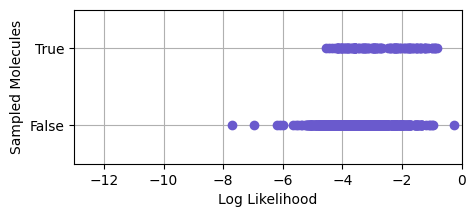

In [60]:
file = '/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_version4_BS32.csv'
plot_log_lhs(file)

Lowest log_lhs with True:  -4.6152768135
Number of False below lowest True:  98


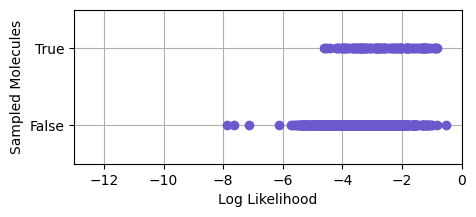

In [61]:
file = '/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_version5_BS32.csv'
plot_log_lhs(file)

Lowest log_lhs with True:  -5.9666080475
Number of False below lowest True:  39


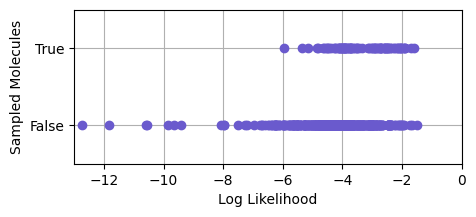

In [62]:
file = '/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_version6_BS32.csv'
plot_log_lhs(file)

Lowest log_lhs with True:  -5.0336103439
Number of False below lowest True:  44


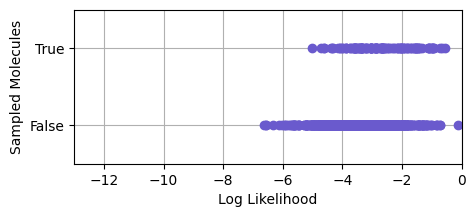

In [63]:
file = '/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_version7_BS32.csv'
plot_log_lhs(file)